# 分子动力学
---

分子动力学是一套分子模拟方法，该方法主要是依靠计算机来模拟分子、原子体系的运动，是一种多体模拟方法。通过对分子、原子在一定时间内运动状态的模拟，从而以动态观点考察系统随时间演化的行为。通常，分子、原子的轨迹是通过数值求解牛顿运动方程得到，势能（或其对笛卡尔坐标的一阶偏导数，即力）通常可以由分子间相互作用势能函数、分子力学力场、全始计算给出。对于考虑分子本身的量子效应的体系，往往采用波包近似处理或采用量子力学的费恩曼路径积分表述方式处理。 分子动力学也常常被采用作为研究复杂体系热力学性质的采样方法。在分子体系的不同状态构成的系综中抽取样本，从而计算体系的构型积分，并以构型积分的结果为基础进一步计算体系的热力学量和其他宏观性质。 分子动力学最早在20世纪50年代由物理学家提出，如今广泛应用于物理、化学、生物体系的理论研究中。 

## 经典模型
---
玻恩-奥本海默近似（Born-Oppenheimer approximation），又称为绝热近似，将原子核和电子的运动分开处理，因为它们的质量和运动速度有很大的差别。这给理论化学家提供了两种选择，即如何对化学系统进行建模，并确定势能：

* 把原子看作是静止的，用薛定谔方程来模拟电子的运动和相互作用。
* 将电子的运动整合到原子核中，并将这些粒子建模为点电荷。对某一特定原子构型的势能的了解意味着有可能比较不同的构型并确定最可能的构型。

前者是量子力学计算的基础，如密度函数理论（DFT）方法。在这些方法中，目的是找到薛定谔方程的迭代解。然而，这些方法在计算上非常昂贵，因此现实中仅限于数百或数千个原子。

后者使用的是被称为经典方法的方法。经典方法涉及使用势能模型（有时称为力场）来模拟化学系统。可能利用经典方法的模拟技术的例子包括分子动力学（我们将在本资料中介绍）、蒙特卡洛、朗文动力学等。势能模型使用数学函数来确定原子的特定构型的势能。使用数学函数来模拟粒子的相互作用，其计算成本比量子力学方法低，这意味着可以模拟更大的系统。

### 1. 范德瓦尔斯相互作用

一个经典模型的例子就是只存在范德瓦尔斯相互作用的粒子，例如惰性元素气体Ar。我们需要一个势能模型，即一个数学公式，用以描述这种相互作用。众所周知，范德瓦耳斯相互作用包括两种力，第一种是长程吸引的伦敦色散力，第二种是短程泡利排斥力。

用于模拟范德瓦尔斯相互作用的常用数学函数是Lennard-Jones势。这个模型考虑了长程吸引力：

$$E_{\text{attractive}}(r) = -4\varepsilon\Big(\dfrac{\sigma}{r}\Big)^6 $$

其中σ是两个粒子之间势能为零的距离，-ε是平衡分离时的势能，而r是两个原子之间的距离。

同时，这个模型也考虑了泡利不相容原理导致的短程排斥力：

$$E_{\text{repulsive}}(r) = 4\varepsilon\Big(\dfrac{\sigma}{r}\Big)^{12} $$

相应的，相互作用力的数学函数为：

$$F = \dfrac{-\partial E(r)}{\partial r} = 48\varepsilon\dfrac{1}{r}\Big(\dfrac{\sigma}{r}\Big)^{12} - 24\varepsilon\dfrac{1}{r}\Big(\dfrac{\sigma}{r}\Big)^6 $$

In [1]:
import numpy as np

def LJ_potential(r, epsilon, sigma):
        """
        :param float r: Distance between particles (Å)
        :param float epsilon: Potential energy at the equilibrium distance (eV)
        :param float sigma: Distance at which the potential energy is zero (Å)
        :returns: Lennard-Jones potential (eV)
        """
        rm_6 = np.power(sigma/r, 6)
        return 4 * epsilon * rm_6**2 - 4 * epsilon * rm_6

def LJ_force(r, epsilon, sigma):
        """
        :param float r: Distance between particles (Å)
        :param float epsilon: Potential energy at the equilibrium distance (eV)
        :param float sigma: Distance at which the potential energy is zero (Å)
        :returns: Lennard-Jones force (eV/Å)
        """
        rm_6 = np.power(sigma/r, 6)
        return 48 * epsilon * rm_6**2 / r - 24 * epsilon * rm_6 / r

Text(0, 0.5, '$F$ (eV/Å)')

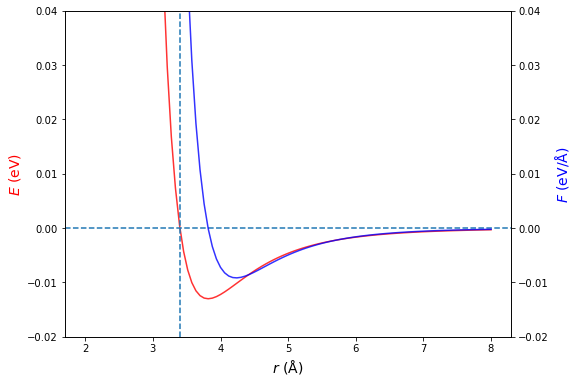

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt

r = np.linspace(2, 8, 100)
epsilon = 0.013
sigma = 3.4
fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(r, LJ_potential(r, epsilon, sigma), 'r', alpha=0.8)
ax.set_ylim(-0.02, 0.04)
ax.set_xlabel(r'$r$ (Å)', fontsize=14)
ax.set_ylabel(r'$E$ (eV)', fontsize=14, color="red")
ax.axhline(0, ls="--")
ax.axvline(sigma, ls="--")

ax2 = ax.twinx()
ax2.plot(r, LJ_force(r, epsilon, sigma), 'b', alpha=0.8)
ax2.set_ylim(-0.02, 0.04)
ax2.set_ylabel(r'$F$ (eV/Å)', fontsize=14, color="blue")

一般来说，Lennard-Jonesz之类的势能模型只可以描述自相互作用，即一个特定原子与另一个同类型原子之间的范德瓦尔斯相互作用。不同类型的原子之间如何相互作用是通过使用混合规则来实现的。例如，最常见的Lorentz-Berthelot规则：

$$\sigma_{ij} = \dfrac{\sigma_{ii} + \sigma_{jj}}{2} \;\;\;\text{and}\;\;\; \varepsilon_{ij} = \sqrt{\varepsilon_{ii}\varepsilon_{jj}}$$



### 2. 静电相互作用

除了范德瓦尔斯相互作用之外，另一类重要的非共价相互作用是带电粒子之间的静电相互作用，使用库仑定律描述：

$$E_{\text{Coulomb}}(r) = \frac{1}{4\pi\varepsilon_0}\frac{q_iq_je^2}{r}$$

其中，$q_i$和$q_j$是粒子上的电子电荷，e是电子的电荷，$\varepsilon_0$是真空的介电率，r是两个点电荷之间的距离。

相应的，库仑力为：

$$F = \dfrac{-\partial E(r)}{\partial r} = \frac{1}{4\pi\varepsilon_0}\frac{q_iq_je^2}{r^2} $$

In [3]:
import numpy as np
from scipy.constants import elementary_charge, epsilon_0

def Coulomb_potential(qi, qj, r):
        """
        :param int qi: Electronic charge on particle i
        :param int qj: Electronic charge on particle j
        :param float r: Distance between particles (Å)
        :returns: Coulomb potential (eV)
        """
        energy_joules = qi*qj*elementary_charge**2 / (4*np.pi*epsilon_0*r*1e-10)
        return energy_joules / elementary_charge

def Coulomb_force(qi, qj, r):
        """
        :param int qi: Electronic charge on particle i
        :param int qj: Electronic charge on particle j
        :param float r: Distance between particles (Å)
        :returns: Force of the Coulombic interaction (eV/Å)
        """
        energy_newton = qi*qj*elementary_charge**2 / (4*np.pi*epsilon_0*r**2*1e-20)
        return energy_newton / elementary_charge * 1e-10

Text(0, 0.5, '$F$ (eV/Å)')

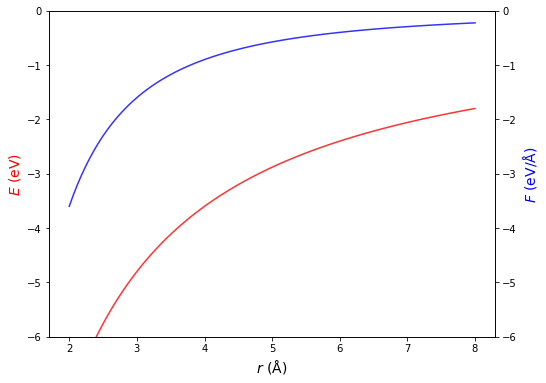

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt

r = np.linspace(2, 8, 100)
qi = 1
qj = -1
fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(r, Coulomb_potential(qi, qj, r), 'r', alpha=0.8)
ax.set_ylim(-6, 0)
ax.set_xlabel(r'$r$ (Å)', fontsize=14)
ax.set_ylabel(r'$E$ (eV)', fontsize=14, color="red")

ax2 = ax.twinx()
ax2.plot(r, Coulomb_force(qi, qj, r), 'b', alpha=0.8)
ax2.set_ylim(-6, 0)
ax2.set_ylabel(r'$F$ (eV/Å)', fontsize=14, color="blue")

### 3. 化学键

借助范德瓦尔斯相互作用和静电相互作用对原子进行模拟对于研究非共价材料非常有用。然而，为了真正探究一个系统的化学特性，我们还必须能够对化学键的相互作用进行数学建模。

一个系统的化学键合的相互作用的势能通常是由键长、键角、二面角（扭转角）和其他高阶过程组成：

$$E_{\text{bonded}} = E_{\text{bond}}(b) + E_{\text{angle}}(\theta) + E_{\text{dihedral}}(\phi) + \ldots$$


这里我们只介绍前两项，键长、键角对势能的贡献。

#### 键长

键长的影响通常可以用简谐势能函数来模拟：

$$E_{\text{bond}}(\mathbf{r}) = \frac{K_b}{2}(r - b_0)^2$$

其中，$b_0$是平衡键长，$K_b$是该键的弹性系数。这些参数在使用前必须在借助实验或者第一性原理计算测定。

下面是这个函数的一个例子，其中使用$H_2$分子中H-H键的参数。

Text(0, 0.5, '$E$ (eV)')

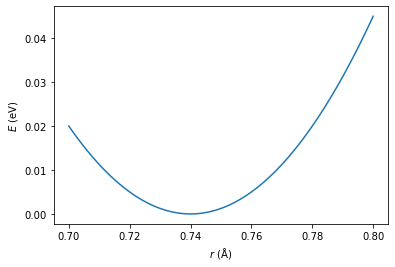

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt

def bond_length(kb, b0, r):
    """
    :param float kb: Bond force constant (eV/Å^2)
    :param float b0: Equilibrium bond length (Å)
    :param float b: Bond length (Å)
    :returns: Energy of the bonded interaction (eV)
    """
    return kb / 2 * (r - b0) ** 2

r = np.linspace(0.7, 0.8, 100)
plt.plot(r, bond_length(25, 0.74, r))
plt.xlabel(r'$r$ (Å)')
plt.ylabel(r'$E$ (eV)')

如果键长偏离了平衡值，增大或者减小都会导致势能升高。

#### 键角

两个连接同一个原子的化学键之间的角度与势能之间的关系也可以使用一个简谐函数描述：

$$E_{\text{angle}}(\theta) = \frac{K_\theta}{2}(\theta - \theta_0)^2$$

其中，$\theta$是测量的角度，$K_\theta$是该角度的力常数，$\theta_0$是平衡角度大小。这个函数与上面显示的键长-势能曲线具有相同的形状。

下面以$H_2O$分子举例，其中参数为H-O键之间的键角。

Text(0, 0.5, '$E$ (eV)')

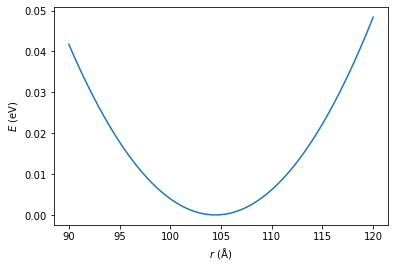

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt

def bond_angle(k_theta, theta_0, theta):
    """
    :param float kb: Bond force constant (eV/Arcdegree^2)
    :param float b0: Equilibrium bond angle (Arcdegree)
    :param float b: Bond angle (Arcdegree)
    :returns: Energy of the bonded interaction (eV)
    """
    return k_theta / 2 * (theta - theta_0) ** 2

theta = np.linspace(90, 120, 100)
plt.plot(theta, bond_angle(4e-4, 104.45, theta))
plt.xlabel(r'$r$ (Å)')
plt.ylabel(r'$E$ (eV)')

## 分子力场
---

在进行分子动力学模拟之前，需要针对特定的场景开发和参数化所需的力场。针对这个问题，科学家在前期研究中提出了多种适用于任何系统的通用力场，可以作为货架产品使用。

这是是一些常见的通用型力场：

* AMBER：常用于DNA和蛋白质
* CFF：设计用于各种有机化合物
* CHARMM：广泛用于小分子
* GROMOS：常用于生物分子系统
* OPLS-AA：针对液体模拟进行了优化

尽管这些潜能模型是以通用性为目的开发的，但仍应谨慎使用。特定系统的化学成分可能与用于生成力场的系统不直接匹配，这可能导致模拟出现系统误差。

## 边界条件
---

前一章中，我们让粒子在盒子边界上发生弹性碰撞。这样的模型只能处理非常有限的粒子数。

要用这有限个粒子反映宏观相的热力学性质，只能借助于周期性边界来实现。

如下图所示，黑盒子是我们模拟的唯一单元格。当绿色粒子经过单元格的顶部边界时，将被重新放置于盒子的底部（红色虚线所示），同时保持速度不变。我们通过模拟一个简单的单元格来接近了一个无限大的系统。

这种边界条件使模拟中粒子的体积和数量保持不变，同时动量和能量保持不变。

<img src="https://upload.wikimedia.org/wikipedia/commons/2/2e/Limiteperiodicite.svg" style="width: 40%;"/>

## 约化单位
---

在分子动力学模拟中使用国际单位制（SI）是极为不便的。为了保持数据和代码的可读性，我们可以使用如下单位系统：

* 质量 mass = a.m.u 或者 grams/mole
* 长度 distance = Angstroms
* 时间 time = femtoseconds
* 能量 energy = eV
* 力 force = eV/Angstrom
* 温度 temperature = Kelvin
* 电量 charge = multiple of electron charge (1.0 is a proton)

在应用物理公式时，要遵循相应的转换规则。

例如，计算数据中$a$的单位使用$[\mathbf{Angstrom/fs^{2}}]$，但是$\frac{\mathbf{f}}{m}$的单位为$[\mathbf{\frac{eV/Angstrom}{amu}}]$，则牛顿第二定律计算的加速度数值应当做如下变换：

$$[\mathbf{\frac{eV/Angstrom}{amu}}] = {Avogadro \times ElementaryCharge \times 10^{-7}} [\mathbf{Angstrom/fs^{2}}]$$

其中 Avogadro 为阿伏伽德罗常数，ElementaryCharge 为质子电量。

In [7]:
from scipy.constants import Avogadro, elementary_charge

print(Avogadro, elementary_charge)
print("The conversion rate is %.5f "%(Avogadro*elementary_charge*1e-7))

6.02214076e+23 1.602176634e-19
The conversion rate is 0.00965 


## 分子动力学模拟
---

我们使用分子动力学方法和Lennard-Jones势，对惰性单原子气体Ar的二维热运动进行模拟。

### 1. 力和加速度

我们研究的粒子的运动是纯经典的，因此我们可以应用经典力学来研究其动态行为。牛顿第二运动定律：

$$\mathbf{f} = m\mathbf{a}$$

其中$\mathbf{f}$是质量为$m$的原子上受到的合外力，其加速度为$\mathbf{a}$。

任意两个粒子之间的力相互作用力$\mathbf{f}$，可以从相互作用能量$E(r)$中找到。

$$f = \dfrac{-\partial E(r)}{\partial r}$$

这就是说，力是能量相对于粒子位置的一阶导数的负数。我们将使用前面创建的函数，从Lennard-Jones势中计算出力。

#### Lennard-Jones truncated & shifted (LJTS) potential

在实际运算中，出于计算效率的考虑，可以忽略Lennard-Jones的长程作用，将其在特定距离上进行截断，从而得到LJTS势。最常用的截断距离是平衡距离的2.5倍。

In [8]:
import numpy as np

def LJ_shifted_potential(r, epsilon, sigma):
        """
        :param float r: Distance between particles (Å)
        :param float epsilon: Potential energy at the equilibrium distance (eV)
        :param float sigma: Distance at which the potential energy is zero (Å)
        :returns: Lennard-Jones potential (eV)
        """
        r_cutoff = 2.5 * sigma
        r_cutoffm_6 = np.power(sigma/r_cutoff, 6)
        potential_shift = 4 * epsilon * r_cutoffm_6**2 - 4 * epsilon * r_cutoffm_6
        rm_6 = np.power(sigma/r, 6)
        LJ_shifted_potential = 4 * epsilon * rm_6**2 - 4 * epsilon * rm_6
        return LJ_shifted_potential - potential_shift

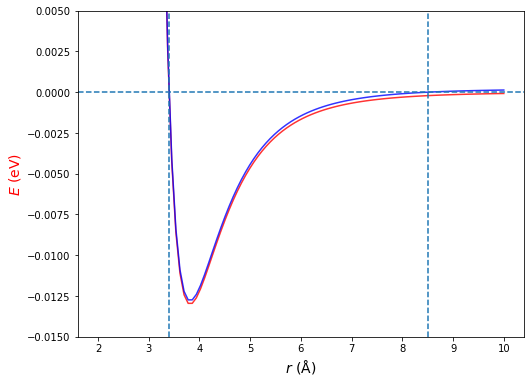

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt

r = np.linspace(2, 10, 100)
epsilon = 0.013
sigma = 3.4
fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(r, LJ_potential(r, epsilon, sigma), 'r', alpha=0.8)
ax.plot(r, LJ_shifted_potential(r, epsilon, sigma), 'b', alpha=0.8)
ax.set_ylim(-0.015, 0.005)
ax.set_xlabel(r'$r$ (Å)', fontsize=14)
ax.set_ylabel(r'$E$ (eV)', fontsize=14, color="red")
ax.axhline(0, ls="--")
ax.axvline(sigma, ls="--")
ax.axvline(2.5 * sigma, ls="--")

### 2. 数值积分

牛顿运动方程是一个二阶微分方程，虽然我们无法使用解析方法处理描述所有粒子运动的微分方程组，但是我们可以借助因变量离散化思想，使用数值方法求解其轨迹方程。

$$\mathbf{x}_i(t + \Delta t) = \mathbf{x}_i(t) + \mathbf{v}_i(t)\Delta t + \dfrac{1}{2} \mathbf{a}_i(t)\Delta t^2$$
$$\mathbf{v}_i(t + \Delta t) = \mathbf{v}_i(t) + \dfrac{1}{2}\big[\mathbf{a}_i(t) + \mathbf{a}_i(t+\Delta t)\big]\Delta t$$

其中，$\Delta t$是时间步长（时间的增量），$\mathbf{x}_i$是粒子位置，$\mathbf{v}_i$是速度，$\mathbf{a}_i$是加速度。这对方程被称为Velocity-Verlet算法，其基本流程为：
1. 计算粒子上的力（得到加速度）
2. 计算某个时间段后粒子的位置
3. 在新位置上计算新的力和新的加速度
4. 根据旧位置和新位置的平均加速度，确定粒子的新速度
5. 重复以上步骤

In [10]:
import numpy as np
from scipy.spatial.distance import pdist, squareform
from scipy.constants import Avogadro, elementary_charge

class MDsimulation:

    def __init__(self, pos, vel, box_size, m=39.948, epsilon=0.0103, sigma=3.4, pbc=True):
        """
        Initialize the simulation with identical particles of mass m.
        The intermolecular interactions are described using Lennard-Jones potential.
        The n x 2 state arrays pos and vel hold the n particles'
        positions in their rows as (x_i, y_i) and (vx_i, vy_i).
        """
        self.pos = np.array(pos, dtype=float)  # Å
        self.vel = np.array(vel, dtype=float)  # Å/fs
        self.box_size = box_size  # Å
        self.n = self.pos.shape[0]
        self.m = m / Avogadro / elementary_charge * 1e7  # amu to eVfs^2/Å^2
        self.epsilon = epsilon  # eV
        self.sigma = sigma  # Å
        self.r_cutoff = 2.5 * sigma  # Å
        self.pbc = pbc
        self.force = self.update_force(pos)  # eV/Å, Å
        self.t = 0  # femtosecond

    def LJ_shifted_potential(self, r):
        """
        Lennard-Jones truncated & shifted (LJTS) potential
        :param float r: Distance between particles (Å)
        :param float epsilon: Potential energy at the equilibrium distance (eV)
        :param float sigma: Distance at which the potential energy is zero (Å)
        :returns: Lennard-Jones potential (eV)
        """
        r_cutoffm_6 = np.power(self.sigma/self.r_cutoff, 6)
        potential_shift = 4 * self.epsilon * r_cutoffm_6**2 - 4 * self.epsilon * r_cutoffm_6
        rm_6 = np.power(self.sigma/r, 6)
        LJ_potential = 4 * self.epsilon * rm_6**2 - 4 * self.epsilon * rm_6
        return LJ_potential - potential_shift

    def LJ_shifted_force(self, r):
        """
        Calculate force (eV/Å) using Lennard-Jones truncated & shifted (LJTS) potential
        """
        rm_6 = np.power(self.sigma/r, 6)
        LJ_force = 48 * self.epsilon * rm_6**2 / r - 24 * self.epsilon * rm_6 / r
        r_cutoffm_6 = np.power(self.sigma/self.r_cutoff, 6)
        LJ_shifted_force = 48 * self.epsilon * r_cutoffm_6**2 / r - 24 * self.epsilon * r_cutoffm_6 / r
        return LJ_force - LJ_shifted_force

    def update_force(self, pos):
        """
        Update forces
        """
        force = np.zeros_like(pos)
        if self.pbc is True:
            pos_left = pos[pos[:,0] < self.r_cutoff] + [self.box_size[0],0]
            pos_right = pos[pos[:,0] > (self.box_size[0] - self.r_cutoff)] - [self.box_size[0],0]
            pos_extended = np.concatenate((pos, pos_left, pos_right))
            pos_top =  pos[pos[:,1] < self.r_cutoff] + [0, self.box_size[1]]
            pos_bottom =  pos[pos[:,1] > (self.box_size[1] - self.r_cutoff)] - [0, self.box_size[1]]
            self.pos_extended = np.concatenate((pos_extended, pos_top, pos_bottom))
        else:
            self.pos_extended = pos
        self.dist = squareform(pdist(self.pos_extended))
        iarr, jarr = np.where(self.dist < self.r_cutoff)
        for i, j in zip(iarr, jarr):
            if i == j: continue
            if i >= self.n: continue
            r = self.dist[i, j]
            force[i] += self.LJ_shifted_force(r) * (self.pos_extended[i] - self.pos_extended[j]) / r
        return force

    def advance(self, dt):
        """
        Advance the simulation by dt femtosecond.
        """
        self.t += dt
        # Update the particles' positions and velocities using Velocity-Verlet algorithm
        a_0 = self.force / self.m
        self.pos += self.vel * dt + 0.5 * a_0 * dt**2
        self.force = self.update_force(self.pos)
        a_1 = self.force / self.m
        self.vel += 0.5 * (a_0 + a_1) * dt
        if self.pbc is True:
            self.pos = self.pos % self.box_size
        else:
            # Bounce the particles off the walls by reflecting their velocity vectors
            hit_left_wall = self.pos[:, 0] < 0
            hit_right_wall = self.pos[:, 0] > self.box_size[0]
            hit_bottom_wall = self.pos[:, 1] < 0
            hit_top_wall = self.pos[:, 1] > self.box_size[1]
            self.vel[hit_left_wall | hit_right_wall, 0] *= -1
            self.vel[hit_bottom_wall | hit_top_wall, 1] *= -1

    def get_potential_energy(self):
        """
        :param float vel: Positions of particles (Å)
        :returns: Total potential_energy (eV)
        """
        potential_energy = 0.0
        iarr, jarr = np.where(self.dist > 0.1)
        for i, j in zip(iarr, jarr):
            if i >= j or i >= self.n: continue
            r = self.dist[i, j]
            potential_energy += self.LJ_shifted_potential(r)
        return potential_energy

    def get_kinetic_energy(self):
        """Returns the total kinetic_energy (eV) """
        return np.sum(0.5 * self.m * np.sum((self.vel)**2, axis=1))

    def get_temperature(self):
        """Returns the temperature (K)"""
        mean_kinetic_energy = self.get_kinetic_energy() / self.n
        return mean_kinetic_energy * elementary_charge / Boltzmann

    def get_pressure(self):
        """Returns the pressure (eV/Å^2)"""
        mean_kinetic_energy = self.get_kinetic_energy() 
        volume = np.prod(self.box_size)
        return mean_kinetic_energy / volume

上述过程是单步数值积分，Velocity-Verlet算法是我们使用的积分器。

这个算法对于两个以上的粒子是高度非线性的，其只对非常小的$\Delta t$有效，如果使用较大的时间步长，计算出的加速度将不准确，因为原子所受外力在该时间间隔内可能发生很大变化。

时间步长的通常选择是$10^{-15}$秒（飞秒）。因此，为了模拟一纳秒的 "实时 "分子动力学，必须使用上述算法进行一百万次迭代。这对于大型的系统（例如生物分子）来说可能是非常缓慢的。

### 3. 模型初始化

在运行分子动力学模拟之前，我们还需要设置系统的初始状态：$t=0$时粒子的位置和速度。

粒子的位置可以从结构数据库（例如蛋白质结构数据库或者晶体学数据库）获取，或者基于对系统的认识自行构建（例如，具有面心立方结构的CaF2的表面模型）。这个初始结构的重要性怎么强调都不为过。如果初始结构不能代表平衡结构，可能需要很长时间才能得到平衡结构，或者永远无法获得合理结构。

对粒子速度进行初始化的过程更为普通。因为系统的总动能$E_K$取决于模拟的温度$T$。

$$E_K = \sum_{i=1}^N \dfrac{m_i|v_i|^2}{2} = \dfrac{3}{2}Nk_BT$$

其中，$m_i$是粒子i的质量，N是粒子的数量，$k_B$是玻尔兹曼常数。

对于我们将要模拟的二维系统，粒子总动能和温度的关系为：

$$E_K = Nk_BT$$

In [11]:
from scipy.constants import Boltzmann, Avogadro

def initial_velocity(T, mass):
    """
    :param float T: Temprature (K)
    :param float T: Mass of particle (amu)
    :returns: root mean square velocity of particles (Å/fs)
    """
    mass_Kg = mass / 1e3 / Avogadro
    knetic_energy_joules = Boltzmann * T
    velocity = np.sqrt(2*knetic_energy_joules/mass_Kg)  # m/s
    return velocity / 1e5  # convert to Å/fs

amu_Ar = 39.948
epsilon = 0.0103
sigma = 3.4

# RMS Veocity at room temprature
rms_velocity = initial_velocity(300, amu_Ar)
print('The root mean square velocity of Ar at 300K is %.4f Å/fs' %(rms_velocity))

The root mean square velocity of Ar at 300K is 0.0035 Å/fs


我们将使用如下参数对模型进行初始化：
1. 系统的尺寸为10 nm × 10 nm
2. 粒子的初始位置为随机值，最小间距为3 Å
2. 系统的初始温度为300 K，对应于粒子的初始速率为0.0035 Å/fs
3. 粒子的初始运动方向为随机值
4. 使用NVE系综（孤立系统），即粒子数、系统尺寸和系统总能量保持不变

In [12]:
n = 64
box_size = np.array([100, 100])
pos = np.random.random((n, 2)) * (box_size - sigma) + sigma/2 
while np.min(pdist(pos)) < 3:
    pos = np.random.random((n, 2)) * (box_size - sigma) + sigma/2

vel_dir = np.random.random((n, 2))-0.5
vel = rms_velocity * vel_dir / np.atleast_2d(np.linalg.norm(vel_dir, axis=1)).T

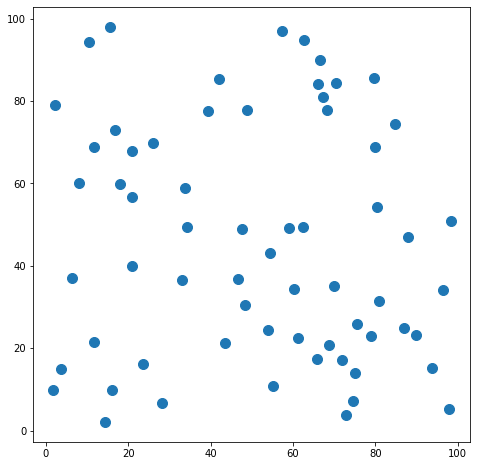

In [13]:
%matplotlib inline
import matplotlib.pyplot as plt

sim = MDsimulation(pos, vel, box_size)

fig, ax = plt.subplots(figsize=(8, 8))
ax.set_aspect(1)
ax.scatter(sim.pos[:,0], sim.pos[:,1], s=100)

### 4. 粒子的动能和势能

系统的总能包括动能和势能。动能项和势能会相互转换，因此体系的温度（粒子动能）会变化或者波动。

In [14]:
print('The initial temperature is %.3f K' %(sim.get_temperature()))
print('The initial kinetic energy is %.3f eV' %(sim.get_kinetic_energy()))
print('The initial potential energy is %.3f eV' %(sim.get_potential_energy()))
print('The initial total energy is %.3f eV' %(sim.get_kinetic_energy()
                                              + sim.get_potential_energy()))

The initial temperature is 300.000 K
The initial kinetic energy is 1.655 eV
The initial potential energy is 0.461 eV
The initial total energy is 2.115 eV


### 5. 模拟开始

In [15]:
%%timeit -n 1 -r 1
run_time = 1e4  #  10 ps
dt = 10
for i in range(int(run_time/dt)):
    sim.advance(dt)

print('Simulation Time    %.3f  ps' %(sim.t/1000))
print('Temperature        %.3f  K' %(sim.get_temperature()))
print('Kinetic energy     %.3f  eV' %(sim.get_kinetic_energy()))
print('Potential energy   %.3f  eV' %(sim.get_potential_energy()))
print('Total energy       %.3f  eV' %(sim.get_kinetic_energy() 
                                      + sim.get_potential_energy()))

Simulation Time    10.000  ps
Temperature        293.596  K
Kinetic energy     1.619  eV
Potential energy   0.465  eV
Total energy       2.084  eV
1.37 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


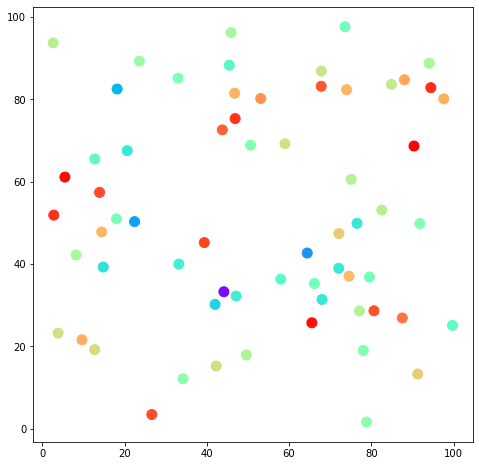

In [16]:
%matplotlib inline
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(8, 8))
ax.set_aspect(1)
vel_norm = np.linalg.norm(sim.vel, axis=1)
colors = [plt.cm.rainbow(p) for p in vel_norm/vel_norm.max()]
ax.scatter(sim.pos[:,0], sim.pos[:,1], c=colors, s=100)

### 6. 可视化

我们使用不用的颜色标记不同速度的粒子，红色表示高速，蓝色表示低速。

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
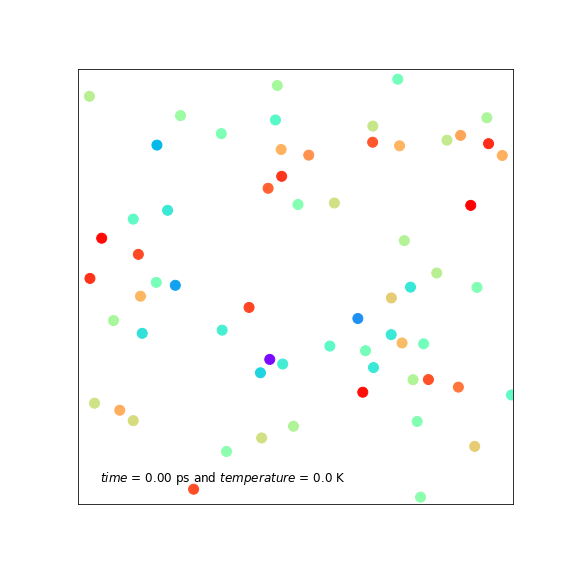

In [17]:
%matplotlib widget
from matplotlib import pyplot as plt
from matplotlib.animation import FuncAnimation

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, aspect='equal', autoscale_on=False)
ax.set_xlim(0, sim.box_size[0])
ax.set_ylim(0, sim.box_size[1])
ax.set_xticks([])
ax.set_yticks([])

vel_norm = np.linalg.norm(sim.vel, axis=1)
colors = [plt.cm.rainbow(p) for p in vel_norm/vel_norm.max()]
particles = ax.scatter(sim.pos[:,0], sim.pos[:,1], c=colors, s=100)
label = ax.text(0.05 * sim.box_size[0], 0.05 * sim.box_size[1], '$time$ = {:.2f} ps and $temperature$ = {:.1f} K'.format(0, 0), size=12)

def animate(i):
    dt = 10
    for nsteps in range(50):  # plot every 0.5 ps
        sim.advance(dt)
    particles.set_offsets(sim.pos)
    vel_norm = np.linalg.norm(sim.vel, axis=1)
    colors = [plt.cm.rainbow(p) for p in vel_norm/vel_norm.max()]
    particles.set_color(colors)
    label.set_text('$time$ = {:.1f} ps and $temperature$ = {:.1f} K'.format(sim.t/1000, sim.get_temperature()))
    return particles, label

anim = FuncAnimation(fig, animate, frames=200, interval=100, repeat=False, blit=False)

#anim.save('Ar_gas_LJ.gif', writer='imagemagick', fps=10)

### 7. 平衡态和相变

模拟的系统趋于平衡的一个特征就是宏观物理量（例如温度）趋于稳定。

除非关注的是非平衡过程，一般情况下分子动力学模拟需要在平衡态下进行统计数据采集。

对粒子的速度进行比例缩小，可以降低体系的瞬时温度，同时使体系短暂脱离平衡态。体系恢复到平衡态后，一部分势能会转换成动能，导致温度会有一定回升。

In [18]:
sim.vel /= 2

print('The instaneous temperature is %.3f K' %(sim.get_temperature()))

The instaneous temperature is 81.424 K


In [19]:
run_time = 1e4  # 10 ps
dt = 10

for i in range(int(run_time/dt)):
    sim.advance(dt)

print('The instaneous temperature is %.3f K' %(sim.get_temperature()))

The instaneous temperature is 92.560 K


Ar的沸点是87.3K，融点是83.8K。逐步降低温度，可以得到密堆排列的分子晶体。

The instaneous temperature is 42.320 K
The instaneous temperature is 24.396 K


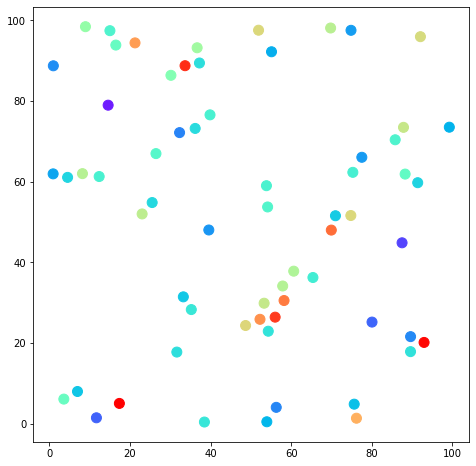

In [20]:
%matplotlib inline
import matplotlib.pyplot as plt

run_time = 2e4  # 20 ps
sim.vel /= 2
for i in range(int(run_time/dt)):
    sim.advance(dt)

print('The instaneous temperature is %.3f K' %(sim.get_temperature()))

run_time = 2e4  # 20 ps
sim.vel /= 2
for i in range(int(run_time/dt)):
    sim.advance(dt)

print('The instaneous temperature is %.3f K' %(sim.get_temperature()))

fig, ax = plt.subplots(figsize=(8, 8))
ax.set_aspect(1)
vel_norm = np.linalg.norm(sim.vel, axis=1)
colors = [plt.cm.rainbow(p) for p in vel_norm/vel_norm.max()]
ax.scatter(sim.pos[:,0], sim.pos[:,1], c=colors, s=100)

## 系综
---

在统计物理中，系综（ensemble）代表一定条件下一个体系的大量可能状态的集合。也就是说，系综是系统状态的一个概率分布。具有相同宏观性质（例如温度）的体系，其微观状态（例如粒子的位置和速度）仍然可以大不相同。实际上，对于一个宏观体系，所有可能的微观状态数是天文数字。

统计物理的一个原理（各态历经原理）是：对于一个处于平衡的体系，物理量的时间平均，等于对对应系综里所有体系进行平均的结果。体系的平衡态的物理性质可以对不同的微观状态求和来得到。

前面介绍的分子动力学模拟示例使用了NVE系综或微正则系综（microcanonical ensemble），其中粒子数（N）、系统体积（V）和系统能量（E）都保持不变。

常用的系综还有：
* NVT系综或正则系综（canonical  ensemble），其中粒子数（N）、系统体积（V）和系统温度（T）都保持不变，系综内各体系可以和外界交换能量。
* NPT系综或等温等压系综（isothermal-isobaric ensemble）：正则系综的推广，各体系可以和外界环境交换能量和体积，但系综内各个体系有相同的温度和压强。

### 恒温器

对于这些系综，有必要确定一种方法来调节系统的温度。最简单（不一定最合理）的方法，是速度缩放，使整个系统的动能更准确地符合所需温度的要求。系统的瞬时温度$T_{\text{inst}}$被定义为：

$$T_{\text{inst}} = \frac{\sum^N_{i=0}{m_i v_i^2}}{2Nk_B}$$

其中，N是粒子的数量，$m_i$是粒子i的质量，$v_i$是粒子i的速度，$k_B$是玻尔兹曼常数。

这意味着，粒子的速度可以通过以下关系来重新分配:

$$v_i = v_i \sqrt{\dfrac{T_{\text{target}}}{\bar{T}}}$$

其中$T_{\text{target}}$是恒温器的目标温度，$\bar{T}$是平均模拟温度。

还有其他各种恒温方法，如Anderson、Nosé-Hoover或Berendsen方法。

为了实现NPT系综，除了恒温器之外，还必须使用限流器。限流器用于控制系统的体积变化，从而使压力在整个模拟过程中保持不变。

In [85]:
class MD_NVT(MDsimulation):

    def thermostat(self, target_T, Q=5):
        '''
        Thermostat
        '''
        kinetic_energy = self.get_kinetic_energy() / self.n
        target_kinetic_energy = Boltzmann * target_T / elementary_charge
        return -(kinetic_energy - target_kinetic_energy) / Q * self.vel

    def advance(self, dt, target_T=None):
        '''
        Advance the simulation by dt femtosecond.
        '''
        self.t += dt
        # Update the particles' positions and velocities using Velocity-Verlet algorithm
        a_0 = self.force / self.m
        if target_T is not None:
            a_0 += self.thermostat(target_T)
        self.pos += self.vel * dt + 0.5 * a_0 * dt**2
        self.force = self.update_force(self.pos)
        a_1 = self.force / self.m
        self.vel += 0.5 * (a_0 + a_1) * dt
        if self.pbc is True:
            self.pos = self.pos % self.box_size
        else:
            # Bounce the particles off the walls by reflecting their velocity vectors
            hit_left_wall = self.pos[:, 0] < 0
            hit_right_wall = self.pos[:, 0] > self.box_size[0]
            hit_bottom_wall = self.pos[:, 1] < 0
            hit_top_wall = self.pos[:, 1] > self.box_size[1]
            self.vel[hit_left_wall | hit_right_wall, 0] *= -1
            self.vel[hit_bottom_wall | hit_top_wall, 1] *= -1

我们直接使用前面示例中的粒子位置和速度。

In [86]:
sim_NVT = MD_NVT(sim.pos, sim.vel, sim.box_size)

print('The instaneous temperature is %.3f K' %(sim_NVT.get_temperature()))

The instaneous temperature is 24.396 K


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
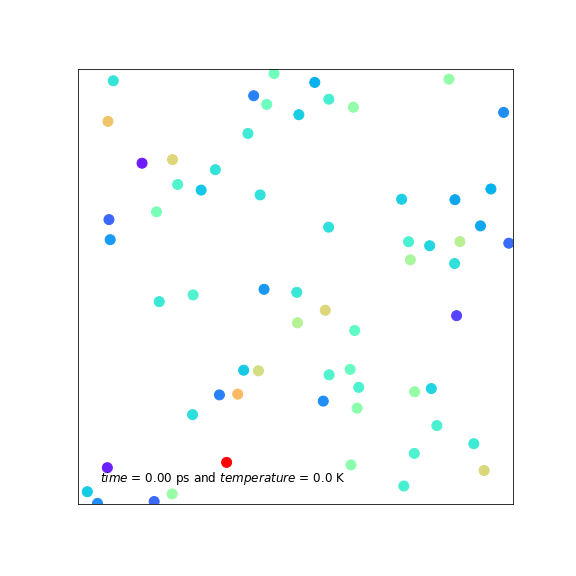

In [87]:
%matplotlib widget
from matplotlib import pyplot as plt
from matplotlib.animation import FuncAnimation

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, aspect='equal', autoscale_on=False)
ax.set_xlim(0, sim_NVT.box_size[0])
ax.set_ylim(0, sim_NVT.box_size[1])
ax.set_xticks([])
ax.set_yticks([])

vel_norm = np.linalg.norm(sim_NVT.vel, axis=1)
colors = [plt.cm.rainbow(p) for p in vel_norm/vel_norm.max()]
particles = ax.scatter(sim_NVT.pos[:,0], sim_NVT.pos[:,1], c=colors, s=100)
label = ax.text(0.05 * sim_NVT.box_size[0], 0.05 * sim_NVT.box_size[1], '$time$ = {:.2f} ps and $temperature$ = {:.1f} K'.format(0, 0), size=12)

target_T = 300
dt = 10
def animate_NVT(i):
    for nsteps in range(50):  # plot every 0.5 ps
        sim_NVT.advance(dt, target_T)
    particles.set_offsets(sim_NVT.pos)
    vel_norm = np.linalg.norm(sim_NVT.vel, axis=1)
    colors = [plt.cm.rainbow(p) for p in vel_norm/vel_norm.max()]
    particles.set_color(colors)
    label.set_text('$time$ = {:.1f} ps and $temperature$ = {:.1f} K'.format(sim_NVT.t/1000, sim_NVT.get_temperature()))
    return particles, label

anim_NVT = FuncAnimation(fig, animate_NVT, frames=200, interval=100, repeat=False, blit=False)

#anim.save('Ar_gas_NVT.gif', writer='imagemagick', fps=10)